In [55]:
import pandas as pd
import json
import re

# 4chan -> Low level moderation (moderation varies from board to board but in escence all illegal related content is removed), aside from ilegal content, the board is also moderated for spam and other types of abuse. The majority of speech aside from that is allowed.

## Cleaning text and performing a base level analysis

In [56]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('../Data/data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [57]:
df.head()

,title,comment
0,All the cool kids are doing it.,&gt;&gt;400714173&gt;no pepe what are you doin...
1,All the cool kids are doing it.,&gt;&gt;400708757https://www.youtube.com/watch...
2,All the cool kids are doing it.,&gt;&gt;400713918&gt;if you don&#039;t like th...
3,All the cool kids are doing it.,&gt;&gt;400708823And I wonder how many big ole...
4,All the cool kids are doing it.,&gt;&gt;400714594Vatniggers get into the meat ...


In [58]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [59]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Remove any website links
    text = re.sub(r'http\S+', '', text)
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ'] and len(token.text) > 3 and 'quot' not in token.text]
    return text

In [60]:
# apply the clean_text function to the dataframe
# df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [61]:
# remove comments with less than 3 words
df = df[df['comment'].apply(lambda x: len(x) > 3)]

In [62]:
df.head()

,title,comment
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian..."
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ..."
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]"
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h..."
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]"


In [63]:
# lets create a new column with the length of the comment
df['length'] = df['comment'].apply(lambda x: len(x))

## Sentiment and Subjectivity Analysis

In [64]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [65]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

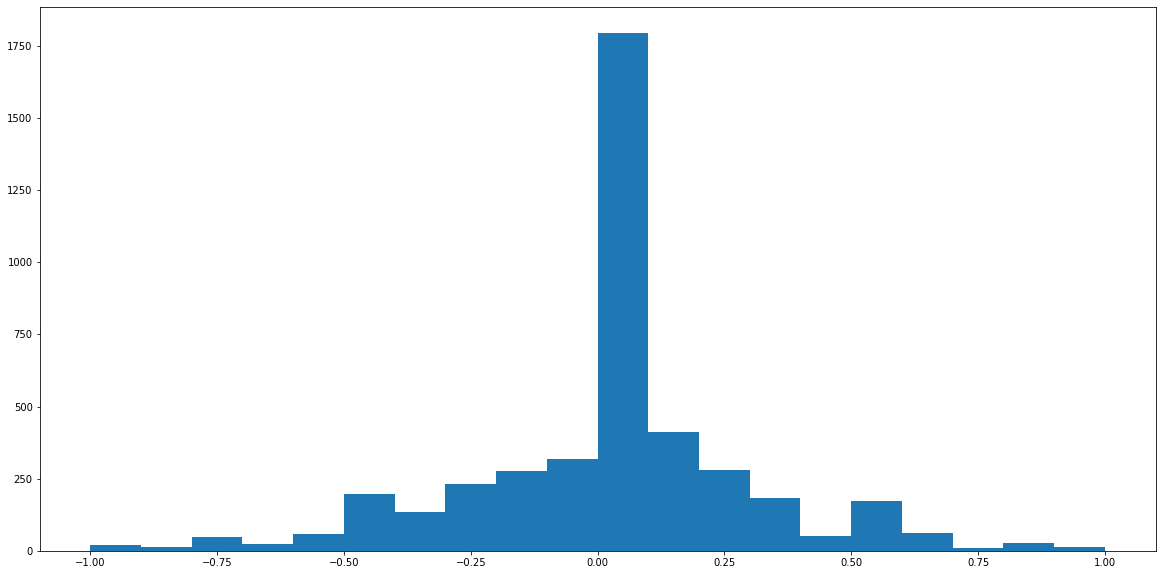

In [66]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(df['sentiment'], bins=20)
plt.show()

In [67]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,length,sentiment
1598,This supermodel seems unhappy with her success...,"[that, sick, they, pete, davidson]",5,-0.714286
4551,&gt;Putin the genocidal war criminal bet on a ...,"[memeflag, retard, smartest, person, roomevery...",6,-0.900000
674,I’m proud to say my president is not a racist.,"[burger, president, retarded, racist]",4,-0.800000
6706,How to avoid eating the bugs:&gt;eat raw eggsF...,"[doubt, this, milk, illegal, canada, legit, fu...",8,-0.550000
6945,I hate the Southern United States (Dixie).,"[posts, idcongratulations, glownigger, fucking...",5,-0.900000


In [68]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,length,sentiment
4100,Is this a waste of time pol? Is Mba A good way...,"[they, good, networking, what, undergrad, stem...",19,0.583333
1315,Why are so many Canadians so obedient to their...,"[anglo, faggot, person, culture, their, city, ...",15,0.800000
3578,"Sigma, delta and gamma males don&#039;t exist ...","[greatest, trick, gamma, world, didn]",5,1.000000
1051,BUT ARE THEY UP TO CODE?I&#039;M THINKING LIKE...,"[vill, yurt, desert, vill, happy]",5,0.800000
4427,/pol/:&gt;capitalism is the greatest economic ...,"[nice, link, nigger, faggot]",4,0.600000


In [69]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.subjectivity)

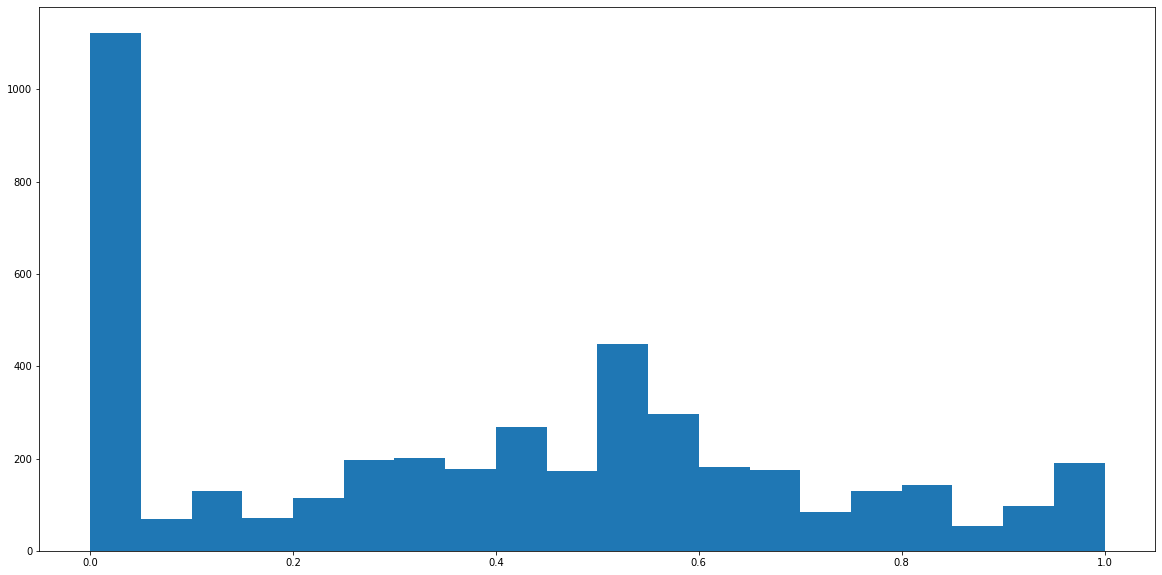

In [70]:
# lets plot the subjectivity of the comments
plt.figure(figsize=(20, 10))
plt.hist(df['subjectivity'], bins=20)
plt.show()

In [71]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
6942,I hate the Southern United States (Dixie).,"[least, child, sacrifice, trash, eyes, what, y...",9,-0.550000,0.600000
3611,Redpill me on synthetic fabrics. /fit/ told me...,"[health, benefits, synthetic, plastic, cotton,...",16,-0.150000,0.733333
2037,Ever since the Neolithic revolution women have...,"[taller, fuck, least, cute, broad, shoulders]",6,-0.034375,0.578125
1967,"Why not just go to a county airport, get a Jet...","[shit, retard, what, exhaust]",4,-0.550000,0.900000
1456,"Apparently, the UK is offering subsidies for a...","[they, simps, this, them, they, nigger, vodka,...",18,0.650000,1.000000


In [72]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
6444,&gt;Jamin Ben Raskin[2] was born to a Jewish f...,"[this, mormon, which, same, thing]",5,0.000000,0.125000
406,IF A LOVED ONE HAS DIED FROM THE JABIs this th...,"[vaccine, sighttaken, speechtaken, hearing]",4,0.000000,0.000000
6365,He&#039;s trying to belittle Andrew Tates conv...,"[shill, fuentes, tate, drama, your, status]",6,0.000000,0.000000
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000
7072,/pol/ humor,"[main, difference, satanism, real, surprise]",5,0.183333,0.316667


56521


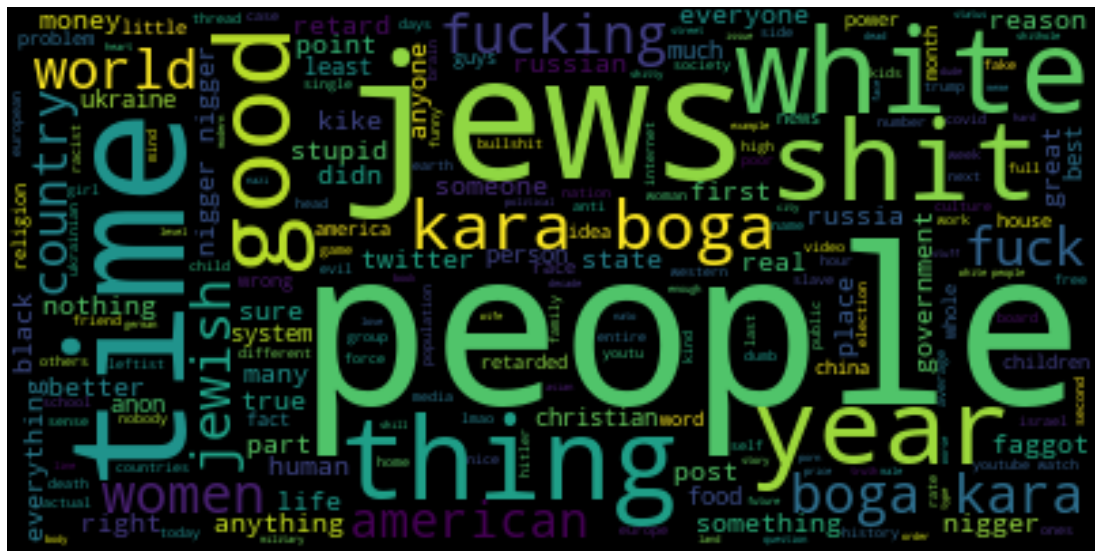

In [73]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.extend(comment)

print(len(all_comments)) # the number of unique words in the comments

# create a word cloud object
wordcloud = WordCloud().generate(' '.join(all_comments))

# plot the word cloud, make it larger
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

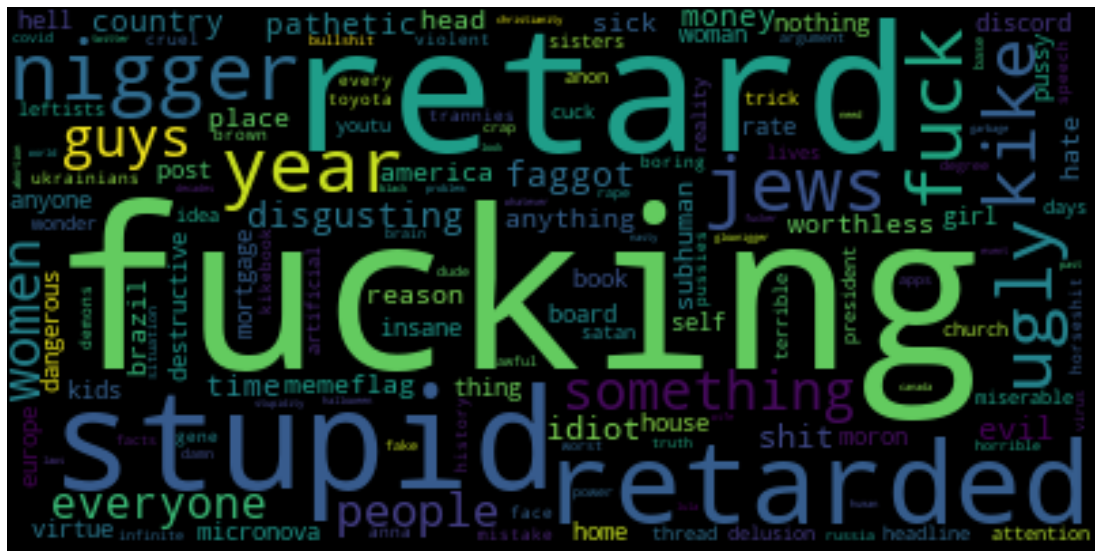

In [74]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [75]:
# check how many unique words are in the comments
total_unique = len(all_comments)

total_words = 0
for comment in df['comment']:
    total_words += len(comment)

# average unique words per comment
unique_words_by_comment = total_unique / total_words
unique_words_by_comment

1.0

In [76]:
total_words

56521

In [77]:
# check how many average words are in the comments
average_words_by_comment = sum(df['length']) / len(df)
average_words_by_comment

13.062398890686389

## Hate Analysis in 4chan: A Case Study
### We scraped data from -> https://en.wikipedia.org/wiki/List_of_ethnic_slurs to generate a hate term corpus which then we used to calculate hate scores for each post in 4chan. Then we calculated the hate score for each thread and plotted the results.

In [78]:
# load the 2 other data frames to check on hate speech
df_hate = pd.read_csv('../../GeneralData/ethnic_slurs.csv')
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [79]:
# r strip Location column
df_hate['Location'] = df_hate['Location'].apply(lambda x: x.rstrip())
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [80]:
# make a set of all unique words in Term 
hate_terms = set()
for term in df_hate['Term']:
    for word in term.split():
        if len(word) < 4:
            continue
        hate_terms.add(word)

In [81]:
# check if the comments contain any of the hate words
hate_score = []
for comment in df['comment']:
    hate_count = 0
    for content in comment:
        for word in hate_terms:
            if word in content:
                hate_count += 1

    hate_score.append(hate_count)

# add the hate score to the dataframe
df['hate_score'] = hate_score
df.head()
                

,title,comment,length,sentiment,subjectivity,hate_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0


In [82]:
df.head(20)

,title,comment,length,sentiment,subjectivity,hate_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2


In [83]:
# get the top 5 rows with the highest hate score
df.sort_values(by='hate_score', ascending=False).head(5)

,title,comment,length,sentiment,subjectivity,hate_score
4981,He is mostly known for not being Michael Jorda...,"[nigger, nigger, nigger, nigger, nigger, nigge...",113,0.000000,0.000000,113
5092,your corrupt right wing politicians are crumbl...,"[this, spam, thread, faggot, niggers, obvious,...",88,0.000000,0.500000,22
3768,What do I put on it /pol/?,"[nigger, niggerniggerniggernigger, niggernigge...",16,0.000000,0.000000,16
7050,All non-Whites are the result of Cro-Magnon (W...,"[theory, they, africans, wrong, releases, htmh...",123,-0.007237,0.210526,15
3119,Even Reddit of all places is not buying it any...,"[they, they, disproportional, amount, whites, ...",98,0.010667,0.342667,14


In [84]:
# Get the percentage of hate score devided by the total length of the comment
df['hate_score_percentage'] = df['hate_score'] / df['length'] * 100
df.head()

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.5
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.0


### Percentage of Hate Score out of total comments -> 6.02%

In [85]:
# get the sum of the total hate score / sum of the total length of the comment * 100
percentage_total_hate = df['hate_score'].sum() / df['length'].sum() * 100
f"{percentage_total_hate:.2f}%"

'6.06%'

In [86]:
# get the top 5 rows with the highest hate score percentage, where length > 5
df[df['length'] > 5].sort_values(by='hate_score_percentage', ascending=False).head(7)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage
3768,What do I put on it /pol/?,"[nigger, niggerniggerniggernigger, niggernigge...",16,0.00,0.000000,16,100.000000
4981,He is mostly known for not being Michael Jorda...,"[nigger, nigger, nigger, nigger, nigger, nigge...",113,0.00,0.000000,113,100.000000
1940,Intredasting we are not having BBC treads righ...,"[white, male, japanese, korean, female, thread]",6,0.00,0.066667,5,83.333333
7181,Is this the most accurate grouping of races?,"[talented, wealthy, whiteyou, mind, average, a...",6,0.35,0.766667,3,50.000000
156,Some people say that after a spree killer shoo...,"[today, stupid, nigger, suspicion, nigger, sure]",6,-0.15,0.944444,3,50.000000
7145,Come and watch niggers beg to be freed from pr...,"[white, prison, resources, niggers, help, years]",6,0.00,0.000000,3,50.000000
5254,is anime a ZOG tool to undermine western mascu...,"[nobody, white, goyim, japanese, cartoons, meds]",6,0.00,0.000000,3,50.000000


### Analysing offensive speech

In [87]:
# load csv as list
import csv
with open('../../GeneralData/offensive_words.csv', 'r') as f:
    reader = csv.reader(f)
    offensive_words = list(reader)[1:]

offensive_words = [word[0] for word in offensive_words]
offensive_words

['arse',
 'arsehead',
 'arsehole',
 'ass',
 'asshole',
 'bastard',
 'bithc',
 'bloody',
 'blood',
 'bollocks',
 'brotherfucker',
 'bugger',
 'bullshit',
 'childfucker',
 'cock',
 'cocksucker',
 'crap',
 'cunt',
 'damn',
 'dick',
 'dickhead',
 'dyke',
 'fatherfucker',
 'frigger',
 'fuck',
 'goddamn',
 'godsdamn',
 'hell',
 'holy shit',
 'horseshit',
 'jesus fuck',
 'kike',
 'motherfucker',
 'nigga',
 'nigra',
 'nigger',
 'piss',
 'prick',
 'pussy',
 'shit',
 'shit ass',
 'shite',
 'sisterfucker',
 'slut',
 'son of a bithc',
 'son of a whore',
 'spastic',
 'twat',
 'wanker']

In [88]:
# check if the comments contain any of the offensive words
offensive_score = []
for comment in df['comment']:
    offensive_count = 0
    for content in comment:
        for word in offensive_words:
            if word in content:
                offensive_count += 1

    offensive_score.append(offensive_count)

# add the offensive score to the dataframe
df['offensive_score'] = offensive_score
df.head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.500000,0
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.000000,1
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.000000,0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.000000,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.000000,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4,23.529412,1
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2,16.666667,0
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1,9.090909,0
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1,6.250000,0
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8


In [89]:
# get the top 5 rows with the highest offensive score
df.sort_values(by='offensive_score', ascending=False).head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score
4981,He is mostly known for not being Michael Jorda...,"[nigger, nigger, nigger, nigger, nigger, nigge...",113,0.000000,0.000000,113,100.000000,113
5092,your corrupt right wing politicians are crumbl...,"[this, spam, thread, faggot, niggers, obvious,...",88,0.000000,0.500000,22,25.000000,22
3768,What do I put on it /pol/?,"[nigger, niggerniggerniggernigger, niggernigge...",16,0.000000,0.000000,16,100.000000,16
2364,Previous: &gt;&gt;402026522Timeline /tug/: htt...,[hahahahahahahahahaaahjahahhhhhhhhhhhhhhahahah...,75,0.008036,0.619643,0,0.000000,12
4706,My top 3 most redpilled songs:Saint PabloNew S...,"[that, pussy, niggas, pussy, contracts, meyou,...",26,0.000000,0.000000,0,0.000000,10
749,Let&#039;s have a discussion about literal ver...,"[slaves, butthurt, rebellion, higher, dimensio...",98,0.036458,0.526389,9,9.183673,10
973,"Why do you hate me, anon?","[holy, shit, mindsi, stupid, kike, fuckface, l...",42,-0.301667,0.591667,4,9.523810,9
5215,Kikes banned Ye from Instagram for 30 days,"[heyhey, fucking, linkyou, fucking, niggerfuck...",9,-0.550000,0.750000,2,22.222222,8
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8
5344,Delaware anon here. Was browsing a local venue...,"[nigger, shit, backyard, delaware, bluer, your...",26,-0.109184,0.683673,2,7.692308,7


In [90]:
percentage_total_offensive = df['offensive_score'].sum() / df['length'].sum() * 100
f"{percentage_total_offensive:.2f}%"

'3.66%'

### Violence Analysis

In [91]:
# Read Csv as list
with open('../../GeneralData/violent_words.csv', 'r') as f:
    reader = csv.reader(f)
    violent_words = list(reader)[1:]

violent_words = [word[0] for word in violent_words]
violent_words

['acid',
 'aggressor',
 'agitator',
 'aim',
 'alert',
 'ambush',
 'ammunition',
 'anarchy',
 'anguish',
 'annihilate',
 'apartheid',
 'arms',
 'arsenal',
 'artillery',
 'assassin',
 'assassinate',
 'assault',
 'atrocity',
 'attack',
 'authority',
 'automatic',
 'faction',
 'fanatic',
 'fatal',
 'fear',
 'fearful',
 'felon',
 'ferment',
 'ferocious',
 'feud',
 'fierce',
 'fiery',
 'fight',
 'fighter',
 'force',
 'forceful',
 'forces',
 'fray',
 'frenzy',
 'front',
 'lines',
 'fuel',
 'fugitive',
 'furtive',
 'cadaver',
 'camouflage',
 'campaign',
 'captive',
 'capture',
 'careen',
 'carnage',
 'casualties',
 'cataclysm',
 'causes',
 'chaos',
 'charge',
 'charred',
 'checking',
 'clandestine',
 'clash',
 'coalition',
 'collapse',
 'combat',
 'commandos',
 'concentration',
 'concussion',
 'conflagration',
 'conflict',
 'confrontation',
 'conquer',
 'consequences',
 'consolidate',
 'conspiracy',
 'conspire',
 'control',
 'coordinates',
 'corpse',
 'counterattack',
 'countermand',
 'crash',

In [92]:
# check if the comments contain any of the violent words
violent_score = []
for comment in df['comment']:
    violent_count = 0
    for content in comment:
        for word in violent_words:
            if word in content:
                violent_count += 1

    violent_score.append(violent_count)

# add the violent score to the dataframe
df['violent_score'] = violent_score
df.head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score,violent_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.500000,0,2
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.000000,1,1
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.000000,0,0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.000000,0,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.000000,0,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4,23.529412,1,3
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2,16.666667,0,1
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1,9.090909,0,0
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1,6.250000,0,1
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8,5


In [97]:
percentage_total_violent = df['violent_score'].sum() / df['length'].sum() * 100
f"{percentage_total_violent:.2f}%"

'6.96%'

## Lets do some natural clustering analysis, let's see how many natural clusters we can find in the data

In [93]:
# Perform a natural clustering on the comments
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# create a list of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.append(' '.join(comment))

# create a tfidf vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# fit the vectorizer to the comments
X = vectorizer.fit_transform(all_comments)

# create a kmeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# fit the kmeans object to the vectorizer
kmeans.fit(X)

# get the cluster labels
labels = kmeans.labels_

# add the cluster labels to the dataframe
df['cluster'] = labels
df.head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score,violent_score,cluster
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.500000,0,2,0
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.000000,1,1,0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.000000,0,0,0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.000000,0,0,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.000000,0,0,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4,23.529412,1,3,2
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2,16.666667,0,1,0
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1,9.090909,0,0,0
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1,6.250000,0,1,0
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8,5,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


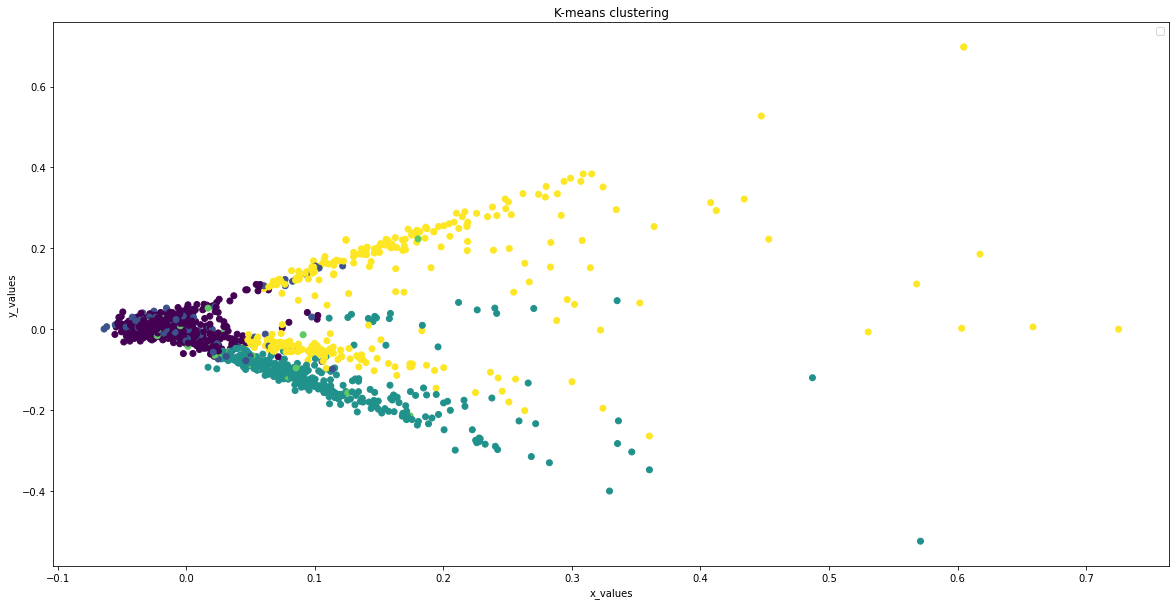

In [94]:
# Plot the clusters
from sklearn.decomposition import PCA

# create a pca object
pca = PCA(n_components=2)

# fit the pca object to the vectorizer
pca.fit(X.toarray())

# get the first two principal components
data2D = pca.transform(X.toarray())

# plot the clusters
plt.figure(figsize=(20,10))
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
# Add legend, title and axis names
plt.legend()
plt.title('K-means clustering')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

In [95]:
# Check the top 10 words in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

Cluster 0:
 shit
 good
 fuck
 women
 fucking
 thing
 nigger
 years
 faggot
 jewish


Cluster 1:
 country
 russia
 american
 china
 ukraine
 europe
 america
 world
 eastern
 fucking


Cluster 2:
 people
 white
 shit
 things
 black
 world
 good
 food
 thing
 jews


Cluster 3:
 time
 shit
 women
 real
 porn
 good
 people
 sure
 retard
 thing


Cluster 4:
 jews
 white
 jewish
 nigger
 black
 anti
 whites
 people
 race
 kanye




c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
# Get 5 random comments from each cluster
for i in range(5):
    print("Cluster %d:" % i)
    for comment in df[df['cluster'] == i]['comment'].sample(5):
        print(' '.join(comment))
    print('\n')

Cluster 0:
isnotreal fuck kikes chan
what many expenses male much housework male woman both ugly wife open relationship half your worth that half
possibility leak subsequent designator change case reality winner adaptation program stock market aftermath stock market crash order economic prosperity united states fact united states nothing value rights beginning great depression stock market record highs years abuse future technology stock market america markets their personal slot machine absurd recovery markets united states entire country months markets they plunge recovery matter months years fundamental economic absurdity either recoveries faces markets will reality winner program dint ability future events phenomenon meme stocks which government undesirable stocks such cryptocurrencies such dogecoin commodities such silver mystery buyers enough capital prices propaganda public permissible narrative topic
upso government money economy bogus metric inflation fuel prices year high pur